In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# All ZFOURGE sources
CDFS = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN5.csv')
COSMOS = pd.read_csv('../DATA/ZFOURGE/COSMOS/COSMOS_MAIN4.csv')
UDS = pd.read_csv('../DATA/ZFOURGE/UDS/UDS_MAIN4.csv')

def zf_data_reduction(df):
    print(f'Number of sources: {len(df)}')

    df = df[df['Use'] == 1] # Use Mask
    print(f'Number of sources Use=1: {len(df)}')
    
    df = df[df['LIR'] > 0] # LIR Mask
    print(f'Number of sources LIR>0: {len(df)}')
    
    df = df[df['F24'] > 0] # F24 Mask
    print(f'Number of sources F24>0: {len(df)}')
    
    df = df[(df['zpk'] >= 0) & (df['zpk'] <= 6)] # Redshift Mask
    print(f'Number of sources 0<z<6: {len(df)}')

    AGN_mask = (df['irAGN'] == 1) | (df['radAGN'] == 1) | (df['xAGN'] == 1) # AGN Mask
    df = df[~AGN_mask]
    print(f'Number of sources AGN=0: {len(df)} \n')
    return df

CDFS = zf_data_reduction(CDFS)
COSMOS = zf_data_reduction(COSMOS)
UDS = zf_data_reduction(UDS)

Number of sources: 30911
Number of sources Use=1: 13299
Number of sources LIR>0: 8486
Number of sources F24>0: 8486
Number of sources 0<z<6: 8469
Number of sources AGN=0: 8193 

Number of sources: 20786
Number of sources Use=1: 12901
Number of sources LIR>0: 7954
Number of sources F24>0: 7954
Number of sources 0<z<6: 7947
Number of sources AGN=0: 7815 

Number of sources: 22093
Number of sources Use=1: 11447
Number of sources LIR>0: 6557
Number of sources F24>0: 6557
Number of sources 0<z<6: 6551
Number of sources AGN=0: 6436 



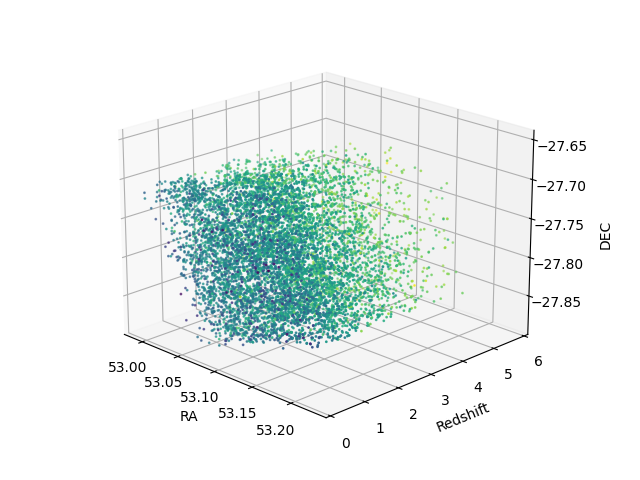

In [5]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ra = CDFS['RAJ2000'] # Right Ascension
dec = CDFS['DEJ2000'] # Declination
lum = np.log10(CDFS['LIR']) # Luminosity
z = CDFS['zpk'] # Redshift
sfr = CDFS['SFR'] # Specific Star Formation Rate


ax.scatter(ra, z, dec, s=1, cmap='viridis', c=np.log10(sfr))
ax.set_xlabel('RA')
ax.set_ylabel('Redshift')
ax.set_zlabel('DEC', rotation=90, labelpad=10)
ax.set_zlabel('DEC')
ax.view_init(azim=-45, elev=20)
ax.set_ylim(0,6)
plt.tight_layout()
plt.savefig('CDFS.png')
plt.show()

In [ ]:
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ra = CDFS['RAJ2000'] # Right Ascension
dec = CDFS['DEJ2000'] # Declination
lum = np.log10(CDFS['LIR']) # Luminosity
z = CDFS['zpk'] # Redshift
max_z = np.ceil(z)

def init():
    ax.scatter(ra, max_z, dec, s=1, cmap='viridis', c=z)
    ax.set_xlabel('RA')
    ax.set_ylabel('Redshift')
    ax.set_zlabel('DEC', rotation=90, labelpad=10)
    return fig,

def animate(i):
    ax.view_init(elev=20., azim=i)
    return fig,
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
anim.save('CDFS_max.gif', fps=30)

ax.view_init(azim=-45, elev=20)
plt.show()